
# Análise Exploratória de Dados

Neste notebook foi realiado uma análise exploratória de dados (EDA), que consiste em buscar entender o comportamento dos atributos que compõem os dados, não somente de forma individual, mas também como esses atributos estão relacionados com a variável de interesse. Esse estudo trará insights sobre o comportamento dos dados, assim como tratamentos necessários para o desenvolvimento de modelos avançados de aprendizado de maquina e também respondera os principais questionamentos levantados no README no repositório.

O conjunto de dados contém 36275 amostras e 19 atributos, e foi baseado no artigo de Antônio Nunes, com o link disponível no READme. A seguir vamos explorar diferentes aspectos dos dados, como distribuição, tendências, correlações e possíveis padrões, para responder a perguntas-chave e orientar futuras etapas de análise.

Nossa análise seguirá as seguintes etapas:
1. Carregamento e Inspeção Inicial dos Dados
2. Análise Descritiva
3. Visualização de Dados
4. Correlação entre Variáveis
5. Identificação de Possíveis Padrões ou Tendências
___ 

# Metadados

Abaixo se encontra o signficiado de cada atributo dos dados

| Nome do Atributo                      | Descrição                                       |
|---------------------------------------|-------------------------------------------------|
| Booking_ID                            | Identificador único do booking.                 |
| no_of_adults                          | Número de adultos.                              |
| no_of_children                        | Número de crianças.                             |
| no_of_weekend_nights                  | Número de noites de final de semana.            |
| no_of_week_nights                     | Número de noites durante a semana.              |
| type_of_meal_plan                     | Tipo de plano de refeição selecionado.          |
| required_car_parking_space            | Espaço de estacionamento necessário.            |
| room_type_reserved                    | Tipo de quarto reservado.                       |
| lead_time                             | Tempo de antecedência da reserva (em dias).     |
| arrival_year                          | Ano de chegada.                                 |
| arrival_month                         | Mês de chegada.                                 |
| arrival_date                          | Data de chegada.                                |
| market_segment_type                   | Tipo de segmento de mercado.                    |
| repeated_guest                        | Indicação se o hóspede é repetido (0 - Não, 1 - Sim). |
| no_of_previous_cancellations          | Número de reservas canceladas anteriormente.   |
| no_of_previous_bookings_not_canceled  | Número de reservas anteriores não canceladas.  |
| avg_price_per_room                    | Preço médio por quarto.                         |
| no_of_special_requests                | Número de pedidos especiais.                    |
| booking_status                        | Status da reserva (Canceled - Cancelada, Not_Canceled - Não cancelada). |
___ 
# Sumário

1. [Carregamento das Bibliotecas](#bibliotecas)
2. [Carregamento e Inspeção Inicial dos Dados](#carregamento-e-inspeção-inicial-dos-dados)
3. [Análise Descritiva](#análise-descritiva)
4. [Visualização de Dados](#visualização-de-dados)
5. [Correlação entre Variáveis](#correlação-entre-variáveis)
6. [Identificação de Possíveis Padrões ou Tendências](#identificação-de-possíveis-padrões-ou-tendências)

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graficos as gr

# Carregamento e Inspeção Inicial dos Dados

In [2]:
class DataInspection:
    def __init__(self):
        self.data = self.data_load()
       
    def data_load(self) -> pd.DataFrame:
        """
        Função para importar e carregar o dataset
        """
        data = pd.read_csv("./Dados/hotel_reservations.csv")
        return data
    
    def data_inspection(self) -> None:
        """
        Função para inspecionar os dados 
        """
        print(f"\nNúmero de vazios {self.data.isnull().sum().sum()}")
        print(f"\nNúmero de duplicados {self.data.duplicated().sum()}\n")      
        display(self.data.info())
        description = self.data.select_dtypes(include=np.number).describe()
        unicos = self.data[description.columns].nunique().values
        description = description.T
        description['unicos'] = unicos
        display(description)
        display(self.data.select_dtypes(exclude=np.number).describe().T)
        

In [3]:
df = DataInspection().data_load()
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
DataInspection().data_inspection()


Número de vazios 0

Número de duplicados 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                        

None

,count,mean,std,min,25%,50%,75%,max,unicos
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0,5
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0,6
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0,8
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0,18
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0,2
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0,352
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0,2
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0,12
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0,31
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0,2


,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Resultados da Análise Exploratória</h3>
    <p style="color: #555555;">As conclusões com essa inspeção inicial são: </p>
    <ul style="color: #555555;">
        <li> Até cerca de 12 categorias únicas, podemos considerar uma variável como categórica.Sendo assim, 9 variáveis numéricas serão tratadas como categóricas.
        <li> Analisando o desvio padrão dos dados numéricos, vemos que a variação de preço fica em torno de 35 dolares. Mas a variável com maior variabilidade é a lead_time, com um desvio padrão maior que a média, indicando uma presença grande de outliers.
        <li> O <strong>booking_ID</strong> é uma função de identificação e deve ser removido.
        <li> Observamos também a grande quantidade de dados desbalanceados da variável alvo, com a frequência de <strong>24490</strong> para uma única categoria</li>
    </ul>
    <h3 style="color: #333333;">Tratamento Necessário Para a Análise</h3>
    <ul style="color: #555555;">
        <li> Passar dados numéricos para o formato string.</li> 
    </ul>
</div>

In [5]:
def treatment(data: pd.DataFrame) -> pd.DataFrame:
    """
    Tratamento dos dados para a análise
    """
    
    dt = data.copy()
    cols_transform = dt.select_dtypes(include=np.number).nunique()[dt.select_dtypes(include=np.number).nunique() <= 12].index
    for col in cols_transform:
        dt[col] = dt[col].astype(str)
    ID = dt.pop("Booking_ID")
    return ID, dt

In [6]:
ID, df = treatment(df)

# Análise Descritiva

## Visualização de Dados

In [7]:
gr.Categoricos().features(df)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'booking_status']


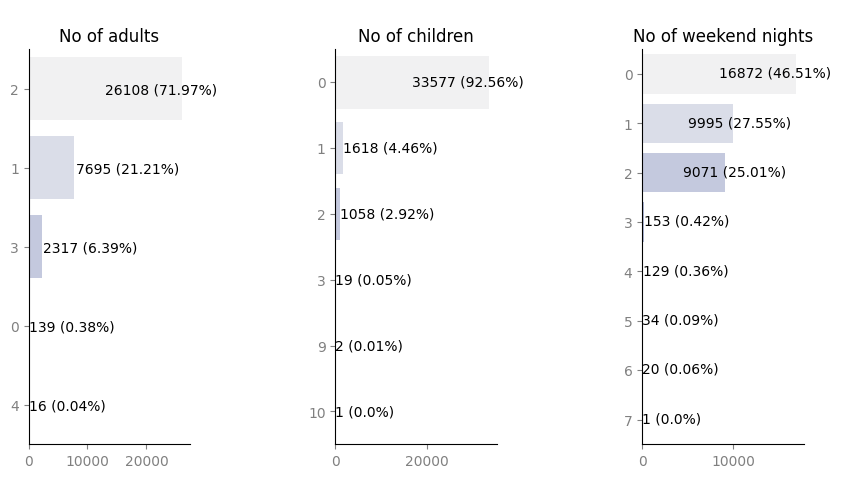

In [8]:
gr.Categoricos().plot_categorial(df, " ", ['no_of_adults', 'no_of_children', 'no_of_weekend_nights'], (1,3))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>O número de adultos, vemos duas classes com baixa representatividade, com menos de 1%. O tratamento viável para esse atributo é incorpora-lo a classes superiores, assim o zero será incorporado por 1 e 4 adultos será incorporado por 3.</li>
    <li>O mesmo pode ser aplicado para o número de crianças. Assumindo valores acima de 2 sendo igual a 2. </li>
    <li>Já para o número de hospedagens no final de semana, podemos agrupar os valores acima ou igual a 3, já que dá para chegar em 1%. Para o modelo previsor, pode-se testar uma incorporação com 2 para averiguar o comportamento dos resultados. </li>
</div>

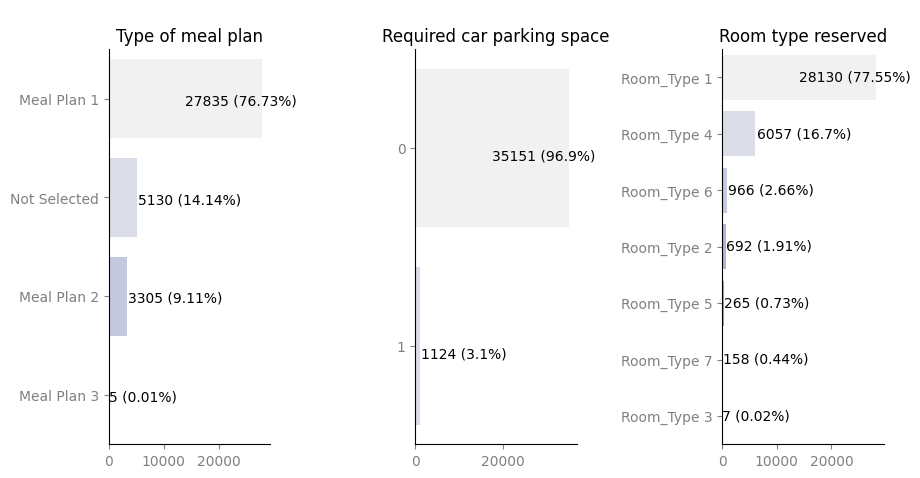

In [9]:
gr.Categoricos().plot_categorial(df, " ", ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved'], (1,3))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>Em relação a feature: tipo de alimento, o tipo 3 pode ser incorporado ao "não selecionado"</li>
    <li>Observa-se que o tipo de quarto, três deles apresentam uma representação abaixo de 1%, então fazendo a incorporação desses quartos pode ser útil para a análise e modelo previsor.</li>
</div>

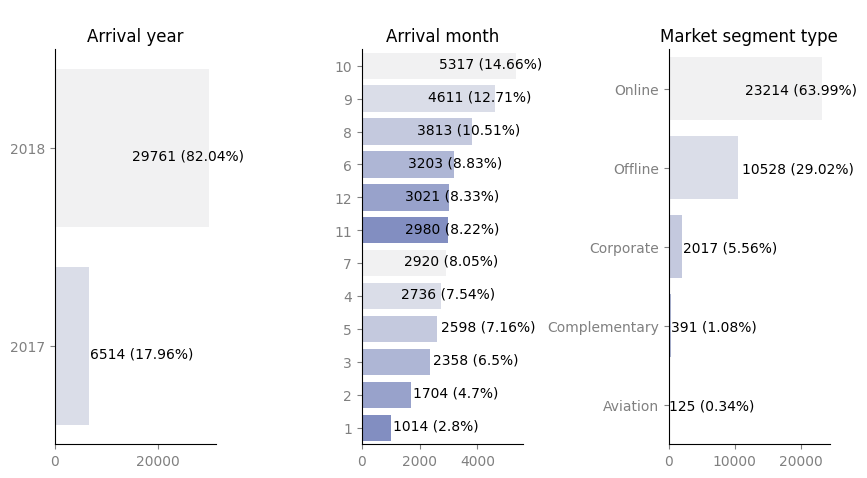

In [10]:
gr.Categoricos().plot_categorial(df, " ", ['arrival_year', 'arrival_month', 'market_segment_type'], (1,3))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>No gráfico acima, vemos que o atributo dos tipos de seguimento de marquete a aviação apresenta menor representatividade, podendo ser incorporado ao complementar.</li>  
</div>

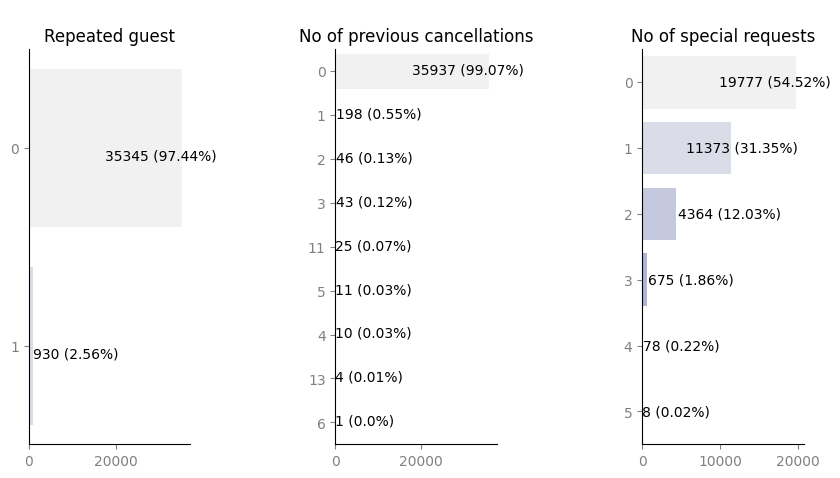

In [11]:
gr.Categoricos().plot_categorial(df, " ", ['repeated_guest', 'no_of_previous_cancellations',
       'no_of_special_requests'], (1,3))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>O número de cancelamentos anteriores demonstra ser muito desbalanceado. Podemos fazer a incorporação de um booleano aqui, mas devido a baixa representatividade, pode ser interessante remover essa variável.</li>  
    <li>Em relação ao número de pedidos especiais, podemos incorporar acima de ou igual a 3, como também criar um booleano aqui.</li> 
</div>

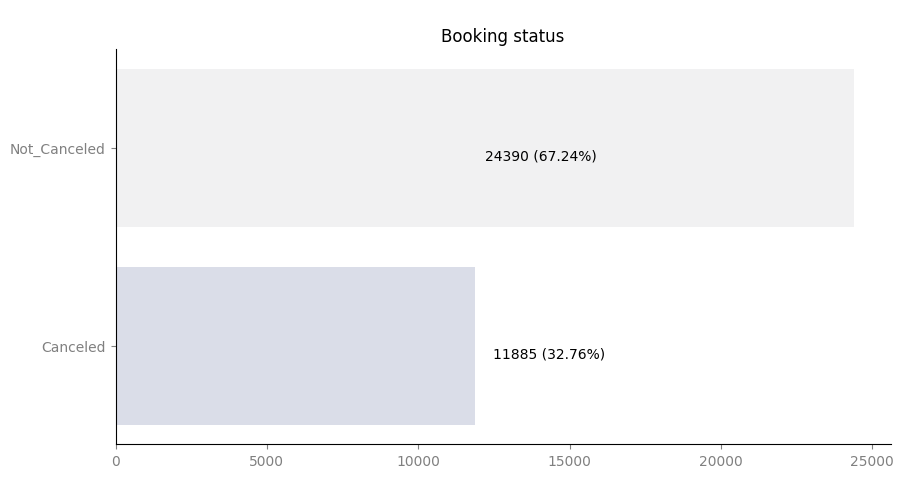

In [12]:
gr.Categoricos().plot_categorial(df, " ", ['booking_status'], (1,1))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>Analisando nossa variável target, vemos que há um desbalanceamento, mas não muito agressivo. </li>  
</div>

In [13]:
gr.Numericos().features(df)

['no_of_week_nights',
 'lead_time',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room']

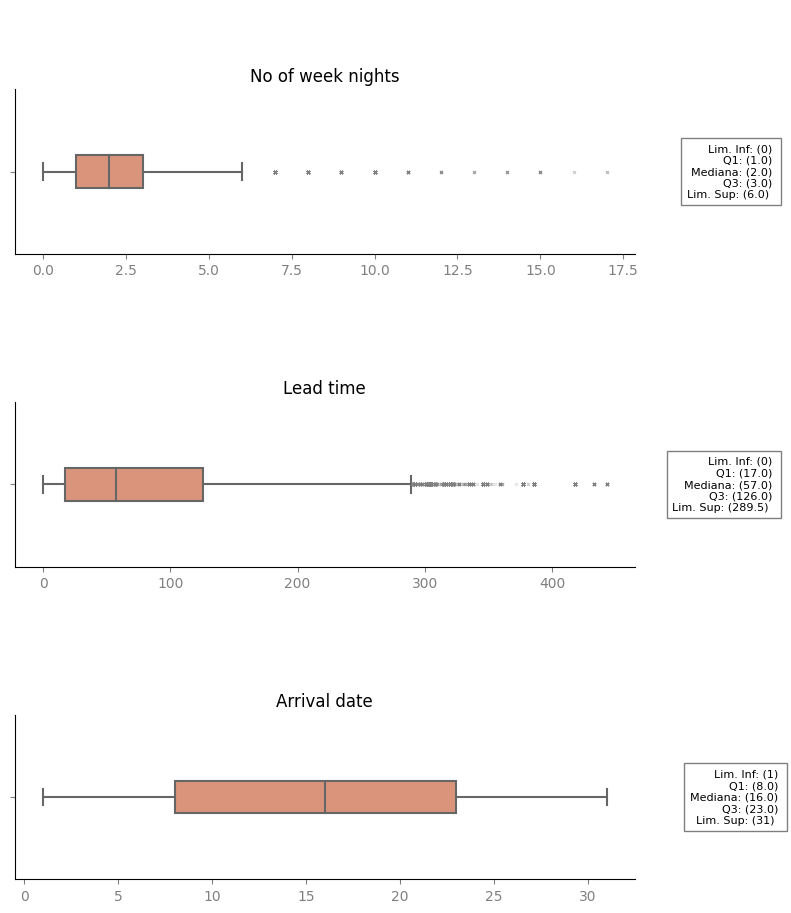

In [14]:
gr.Numericos().plot_numerics(df, " ", ['no_of_week_nights','lead_time','arrival_date'], (3,1))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>Sobre a dispersão dos dados numéricos, o gráfico de caixa nos auxilia entender a distribuição dos dados, mostrando a proporção de aonde os dados estão, como também se há outliers e identificar acima de qual valor é considerado fora da curva.</li>
    <li>Sobre o número de dias da semana hospedados, vemos que 99% dos dados estão presentes dento de 0 a 6 dias e acima disso é considerado outliers.</li>  
    <li>Sobre o intervalo da reserva, vemos que até 290 dias é o normal e reservas acima desse intervalo é considerado outlier.</li>  
</div>

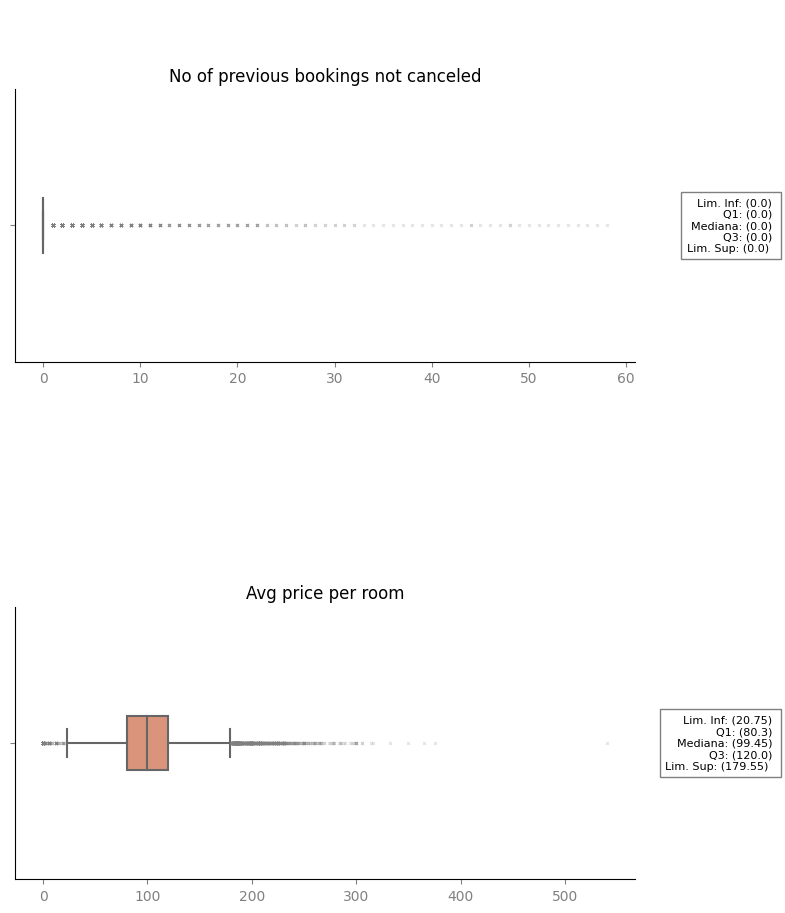

In [15]:
gr.Numericos().plot_numerics(df, " ", ['no_of_previous_bookings_not_canceled', 'avg_price_per_room'], (2,1))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Analisando o gráfico acima</h3>
    <li>Sobre o número de reservas não canceladas, vemos que é outro atributo desbalanceado, podendo até ser removido da nossa análise.</li>
    <li>Em relação ao preço do quarto, vemos que o preço flutua de 20 até 180, com outliers chegando a próximo de 400.</li>
</div>

## Correlação dos dados

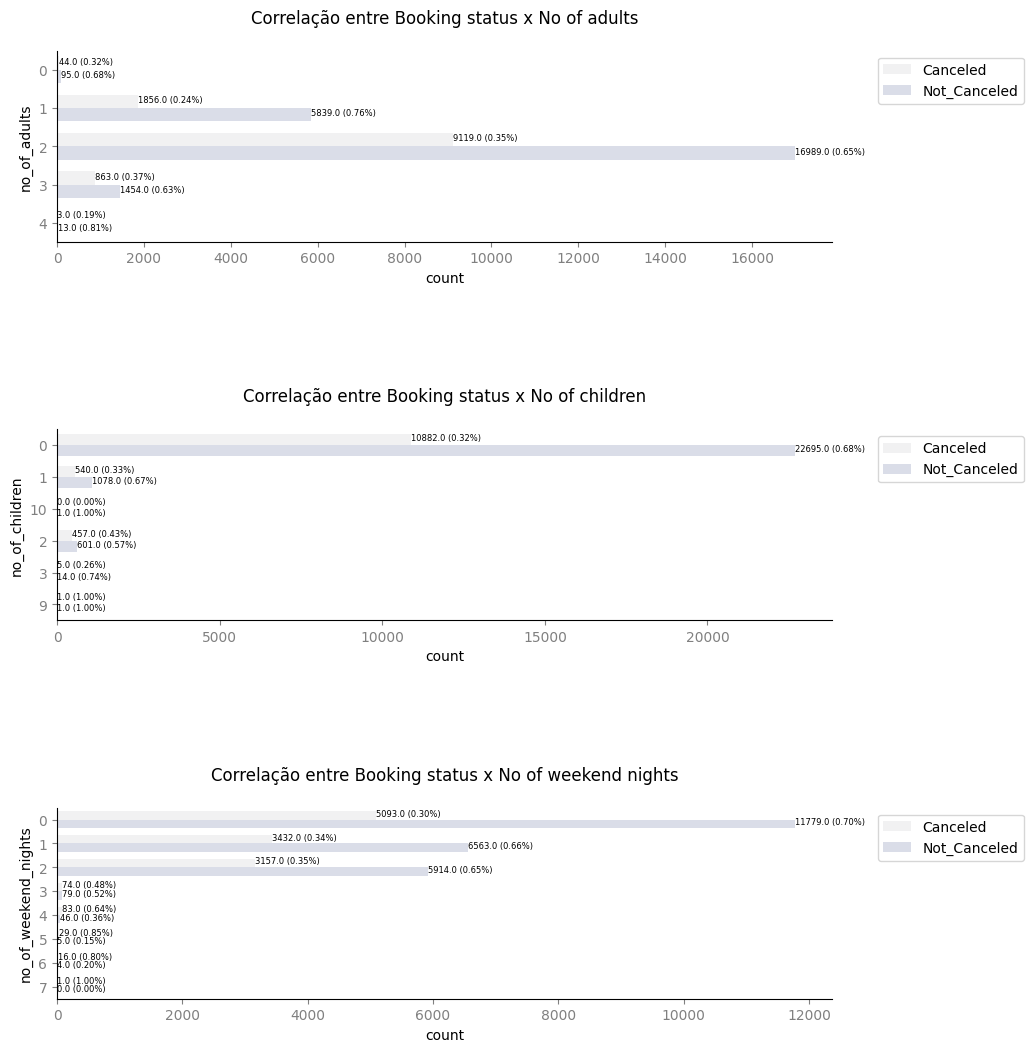

In [16]:
gr.Categoricos().plot_comparacao(df, '',['no_of_adults', 'no_of_children', 'no_of_weekend_nights'],'booking_status', (3,1), 12)

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Em relação ao número de adultos, vemos que 1 e 4+ adultos tende a não cancelar a reserva, enquanto 2 e 3 tem uma taixa um pouco mais baixa de não cancelamento.</li>
    <li>Sobre o número de crianças, não vemos uma mudança muito significativa.</li>
    <li>Por fim, o número de finais de semana nas reservas há uma leve diferença para quando não tem datas nos finais de semana.</li>
</div>

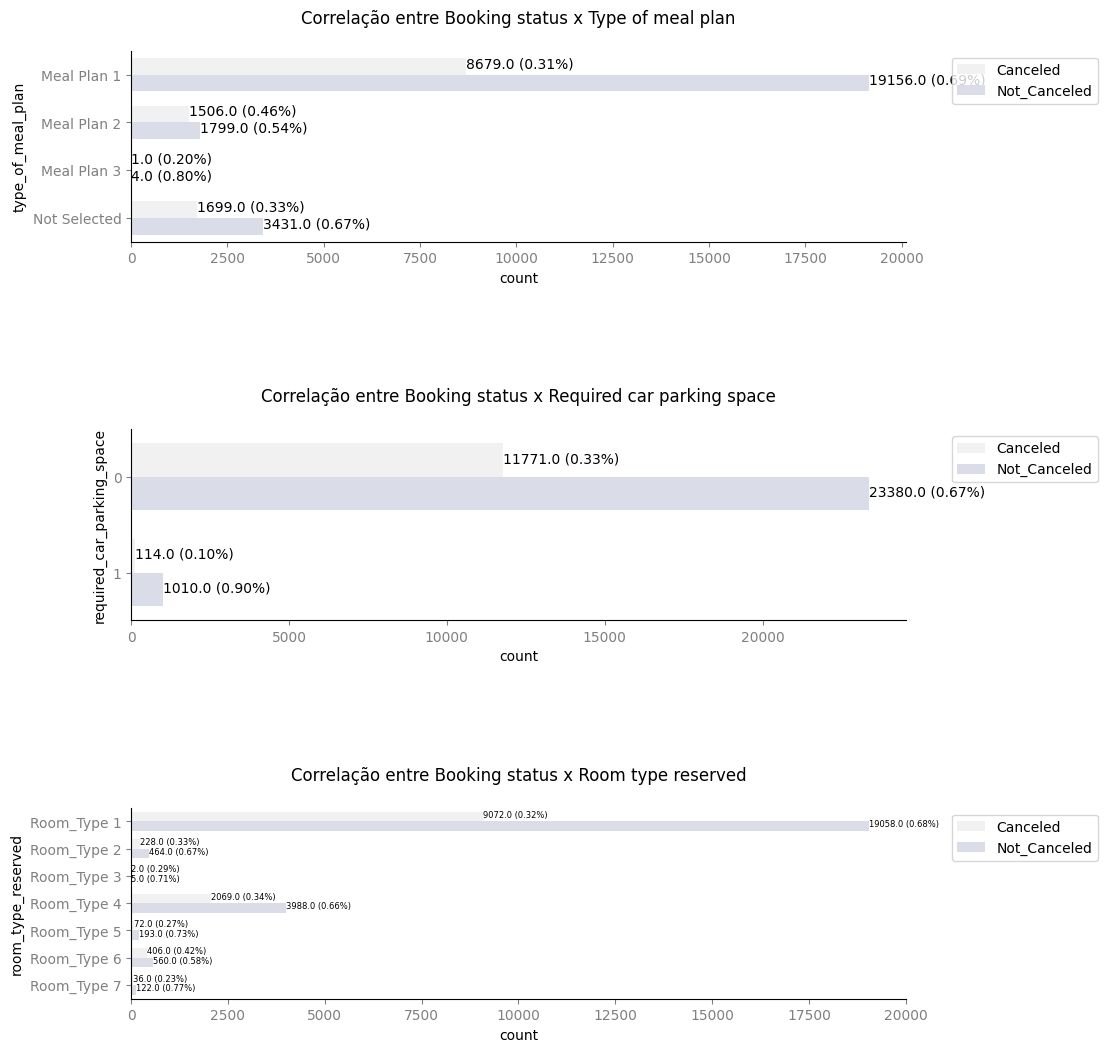

In [17]:
gr.Categoricos().plot_comparacao(df, '',['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved'],'booking_status', (3,1), 12)

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Sobre o cardápio escolhido, vemos que o tipo 2 é a escolha que mais tem cancelamento da reserva.</li>
    <li>Exigir estacionamento demonstrou ser um ponto forte para não haver cancelamento da reserva.</li>
    <li>Sobre o tipo de quarto, vemos que a proporção ficou muito próxima, com destaque para menos cancelamentos nos quartos do tipo 7, 5 e 3</li>
</div>

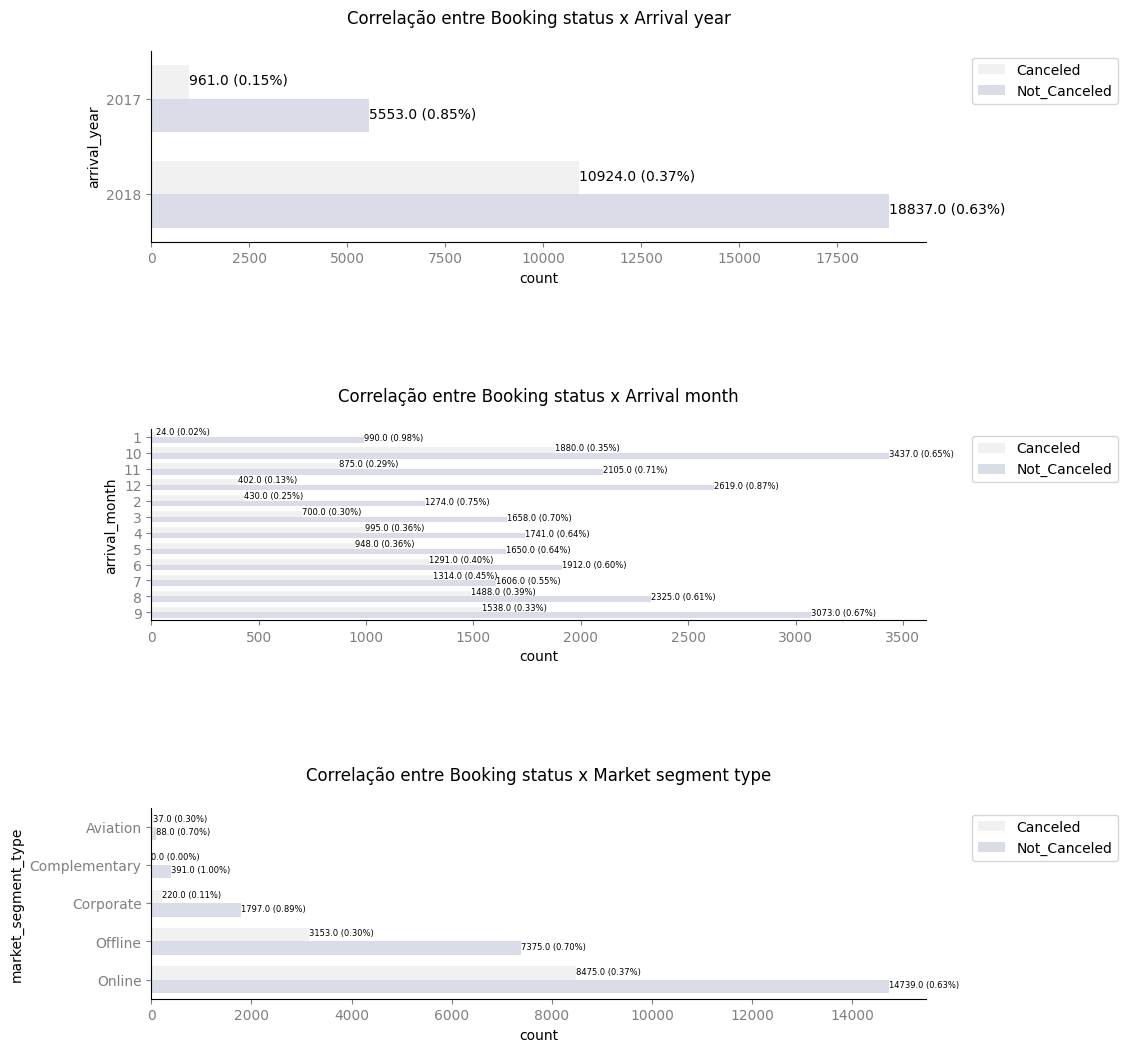

In [18]:
gr.Categoricos().plot_comparacao(df, '',['arrival_year', 'arrival_month', 'market_segment_type'],'booking_status', (3,1), 12)

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Os cancelamentos em 2017 foram menores que 2018</li>
    <li>Os meses 11, 12, 1, 2 e 3 foram de destaque em relação ao baixo número de cancelmanetos, enquanto nos outros meses vemos um aumento do cancelamento das reservas.</li>
    <li>Reservas corporativas tendem a ter menos cancelamento, visto que está relacionado com trabalho então faz um grande sentido.</li>
</div>

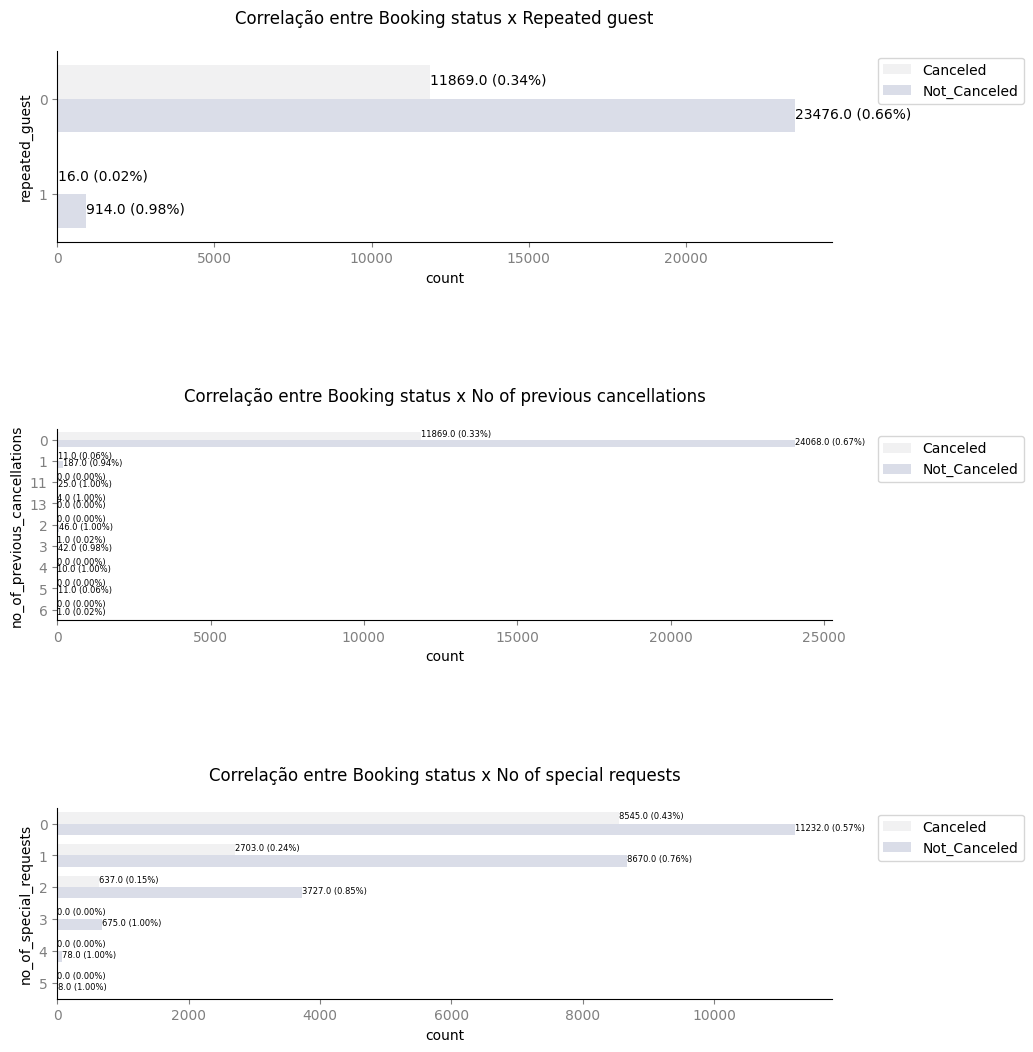

In [19]:
gr.Categoricos().plot_comparacao(df, '',['repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests'],'booking_status', (3,1), 12)

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Vemos que se é um mesmo hospede, tende a não cancelar, sendo um ótimo indicativo.</li>
    <li>Por último, fica claro que a exigência de algum serviço diferente tende a diminuir o número de cancelamentos.</li>
</div>

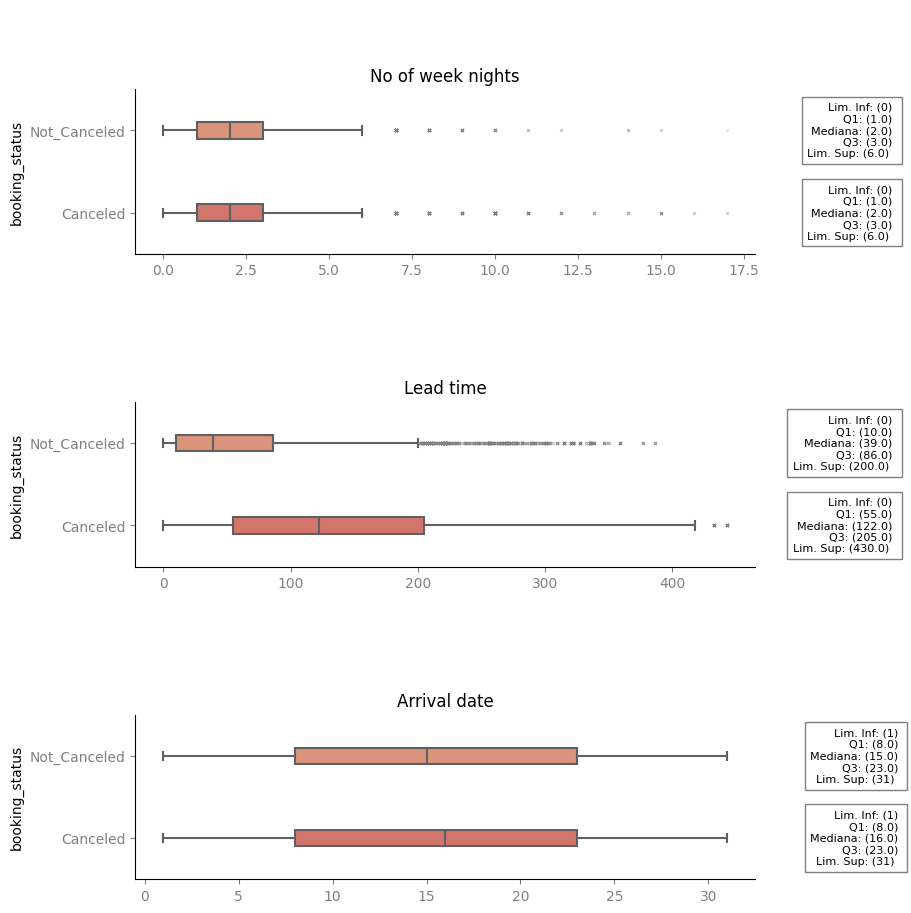

In [21]:
gr.Numericos().plot_comparacao(df, " ", ['no_of_week_nights','lead_time','arrival_date'],'booking_status',(3,1))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Fica claro acima que reservas feitas com um periodo maior de tempo tendem a ser canceladas.</li>
</div>

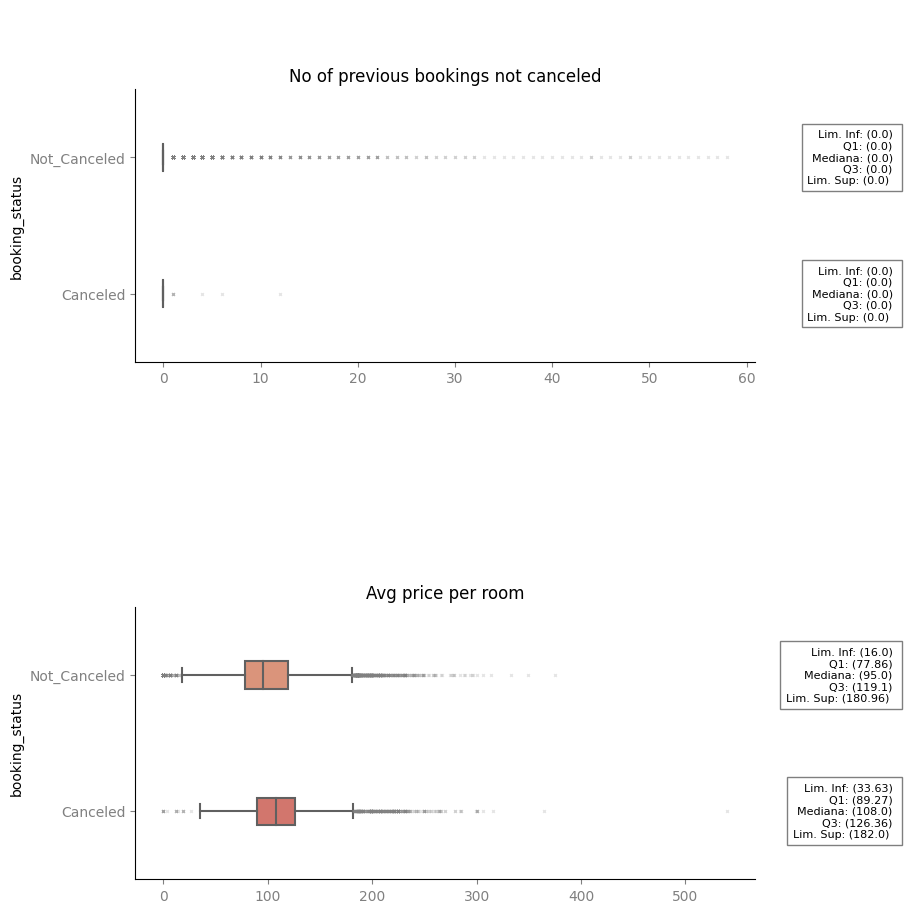

In [22]:
gr.Numericos().plot_comparacao(df, " ", ['no_of_previous_bookings_not_canceled', 'avg_price_per_room'],'booking_status',(2,1))

<div style="background-color: #f0f0f0; border: 1px solid #d9d9d9; border-radius: 5px; padding: 10px;">
    <h3 style="color: #333333;">Insights Presentes no Gráfico Acima.</h3>
    <li>Quartos mais caros tendem, de forma bem leve, a serem cancelados.</li>
</div>